In [14]:
import pickle
from tqdm import tqdm
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
# Trace builiding code
class Trace:
    def __init__(self):
        self.calls = []

class Node_info:
    def __init__(self, num_id, n_type):
        self.num_id = num_id
        self.n_type = n_type

class Call:
    def __init__(self, traceid, timestamp, rpcid, um, dm, rpctype, interface, rt):
        self.traceid = traceid
        self.timestamp = timestamp
        self.rpcid = rpcid
        self.um = um
        self.dm = dm 
        self.rpctype = rpctype
        self.interface = interface
        self.rt = rt
    def string(self):
        return self.traceid + "," + str(self.timestamp) + "," + self.rpcid + "," + self.um + "," + self.dm + "," +\
            self.rpctype + "," + self.interface + "," + str(self.rt)

def csv_to_df(file: str):
    use_columns = list(range(9)) 
    df = pd.read_csv(file,delimiter=',', usecols=use_columns)
    return df

def extract_traceid_rows(df, tid):
    f_df = df[df['traceid'] == tid]
    tid_calls = [
        Call(
            str(row.traceid), 
            int(row.timestamp), 
            str(row.rpcid), 
            str(row.um), 
            str(row.dm), 
            str(row.rpctype), 
            str(row.interface), 
            int(row.rt)
        ) for row in f_df.itertuples(index=False)
    ]
    return tid_calls

def build_digraph_from_df(df, tids_list):
    '''
    Builds digraph. 
    Args: df= list of trace rows, list of tids to build and add
    Returns: A full di graph with tids given.
    '''
    t_edges = []
    for tid in tqdm(tids_list):
        tid_calls = extract_traceid_rows(df, tid)
         # list of edges of trace
        for call in tid_calls:
            t_edges.append((call.um, call.dm))
    G = nx.DiGraph()
    G.add_edges_from(t_edges)
    return G

def build_digraph_from_tracesdict(traces_dict):

    full_graph_edge_list = []
    for edge_list in traces_dict.values():
        full_graph_edge_list.extend(edge_list)
    G = nx.DiGraph()
    G.add_edges_from(full_graph_edge_list)

    return G

In [15]:
'''
Read & Build Original Graph
'''
df = csv_to_df("./casper_rebuild.csv")

# Extract all tids
tids_list = df['traceid'].unique()
num_traces = len(tids_list)
print("Num of tids: ", num_traces)

# Building the full original digraph
G_original = build_digraph_from_df(df, tids_list)
print("Number of nodes:", G_original.number_of_nodes())
# print("Number of edges:", G_original.number_of_edges())

Num of tids:  10421


100%|██████████| 10421/10421 [02:39<00:00, 65.41it/s]


Number of nodes: 3656


In [17]:
'''
Read & Build Sampled graphs
'''

with open('downsampled_graphs/500nodes_5000traces.pkl', 'rb') as pkl_file:
    T_prime = pickle.load(pkl_file)

# Building the sampled original digraph
G_sampled = build_digraph_from_tracesdict(T_prime)
print("Number of nodes:", G_sampled.number_of_nodes())

Number of nodes: 483


In [32]:
def plot_cdf(data, label):
    x_vals = np.sort(data)
    y_vals = np.arange(len(data))/float(len(data))
    plt.plot(x_vals, y_vals, label=label)


In [18]:
'''
Graph Similarity Metrics
In & Out degree distribution
'''

def deg_dist_viz(Gs_and_labels, in_or_out):
    '''
    Generates a CDF graph for in/out deg dist of graphs
    Args: Gs_and_label= list of graphs and their labels,
          in_or_out= 'in' or 'out'
    '''
    for G, label in Gs_and_labels:
        if in_or_out == 'in':
            degrees = G.in_degree(G.nodes())
        elif in_or_out == 'out':
            degrees = G.out_degree(G.nodes())
        deg_dist = [tup[1] for tup in list(degrees)]
        x_vals = np.sort(deg_dist)
        y_vals = np.arange(len(deg_dist))/float(len(deg_dist))
        plt.plot(x_vals, y_vals, label=label)
    if in_or_out == "in":
        plt.xlabel('In-degree')
    elif in_or_out == "out":
        plt.xlabel('Out-degree')
    plt.ylabel('CDF')
    plt.legend()
    plt.tight_layout()
    plt.show()
# Kolmogrov D Statistic

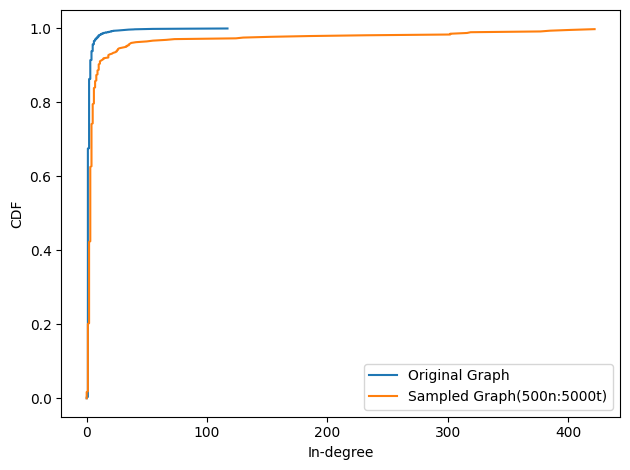

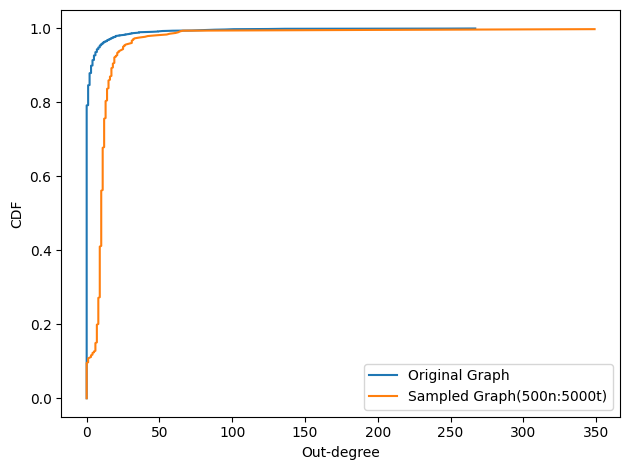

In [21]:
Gs_and_labels = [[G_original, 'Original Graph'],[G_sampled, 'Sampled Graph(500n:5000t)']]
deg_dist_viz(Gs_and_labels, 'in')
deg_dist_viz(Gs_and_labels, 'out')

In [ ]:
'''
Call depth percentage distribution
'''

In [ ]:
'''
Graph Kernel Similarity Score
'''

In [ ]:
'''
Loss of Edges
Baseline: Original Graph
For a fixed n nodes, we get number of edges lost for
different t' values. X:t', Y:num of edges
'''



In [ ]:
'''
Sfsl ratio
'''